<h1 align='center'> 영상처리 프로그래밍 실습 12</h1>

<h6 align='right'> 2025. 6. 12. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 이선재  &nbsp;&nbsp;          학번: 20227123   &nbsp;&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)


* 제출 마감: 6월 18일 (월) 오후 10:00까지 최종본을 SmartLEAD제출



### 문제 1.

MNIST handwritten digits dataset를 이용해서 직접 쓴 숫자를 인식하는 프로그램을 만들려고 한다.

### 1.1

아래 URL에서 mnist_784.arff 파일을 다운로드하라.

https://www.openml.org/search?type=data&sort=runs&id=554&status=active

(Smartlead에서도 다운로드할 수 있다.)


#### 1.2

다음 셀에 있는 프로그램을 실행하라.

In [26]:
import cv2
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### 1.3: 마우스로 숫자 쓰기 인터페이스 만들기

- 목표: OpenCV 마우스 이벤트를 활용하여 마우스로 숫자를 그릴 수 있는 인터페이스를 만든다.

- 세부 조건:
  - 검정 배경 창을 띄우고, 마우스를 움직일 때 궤적을 흰색으로 그려야 한다.
  - 왼쪽 마우스 버튼을 누른 상태에서만 선이 그려지도록 한다.
  - 창의 크기는 MNIST의 크기(28×28)의 정수배로 설정할 것 (예: 280×280)
  - **키보드 'c'**를 누르면 화면이 지워진다.
  - **키보드 'q'**를 누르면 프로그램이 종료된다.

- 힌트:
  - cv2.setMouseCallback() 함수 사용
  - cv2.line() 또는 cv2.circle()로 궤적 표시
  - drawing = True/False 상태 변수 활용


In [27]:
import cv2
import numpy as np

# 전역 변수
drawing = False
last_point = None
thickness = 5  # 선 두께 정의

def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # 선 그리기
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), thickness)
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# 메인 프로그램
canvas = np.zeros((280, 280, 3), dtype=np.uint8)
cv2.namedWindow('Drawing')
cv2.setMouseCallback('Drawing', mouse_callback)

while True:
    cv2.imshow('Drawing', canvas)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('c'):
        canvas = np.zeros((280, 280, 3), dtype=np.uint8)
    elif key == ord('q'):
        break

cv2.destroyAllWindows()

#### 1.4: 선 굵기 비교용 시각화
- 목표: MNIST 이미지와 직접 쓴 숫자를 나란히 비교해서, 마우스 궤적의 굵기를 확인한다.
- 세부 조건:
  - MNIST 훈련 데이터에서 첫 3개 이미지를 불러온다.
  - 마우스로 쓴 이미지를 28x28로 축소(resize) 한다.
  - MNIST 이미지들과 함께 한 화면에 나란히 표시한다.
  - 선의 굵기가 어떻게 다른지 눈으로 비교해 본다.

- 힌트:
  - MNIST 이미지: sklearn.datasets.fetch_openml("mnist_784") 또는 ARFF
  - 마우스 그림은 cv2.resize()로 줄이기




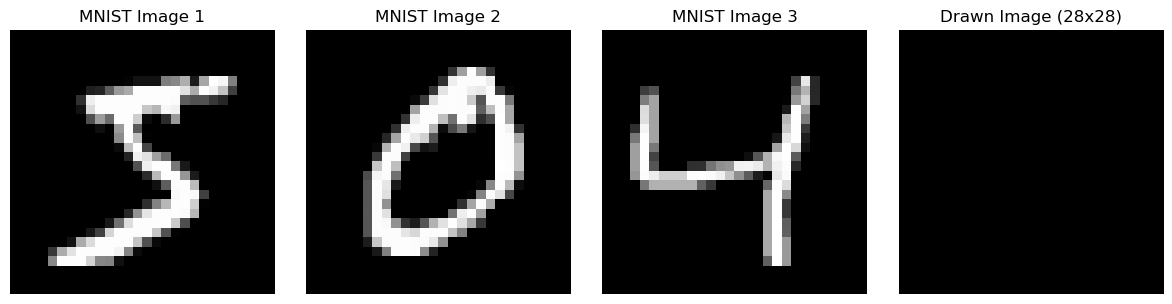

MNIST 이미지 크기: (28, 28)
그린 이미지 크기: (28, 28)
MNIST 픽셀 값 범위: 0 - 255
그린 이미지 픽셀 값 범위: 0 - 0


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd

# MNIST 데이터 로드 (ARFF 파일 사용)
data, meta = arff.loadarff('mnist_784.arff')
df = pd.DataFrame(data)

# 첫 3개 MNIST 이미지 추출
mnist_images = []
for i in range(3):
    # ARFF에서 이미지 데이터 추출 (784개 픽셀)
    img_data = df.iloc[i, :-1].values  # 마지막 열(class) 제외
    img = img_data.reshape(28, 28).astype(np.uint8)
    mnist_images.append(img)

# 마우스로 그린 이미지 (예시 - 실제로는 1.3에서 그린 이미지 사용)
# 여기서는 예시로 간단한 숫자 모양 생성
drawn_image = np.zeros((280, 280, 3), dtype=np.uint8)
# 예시: 숫자 1 그리기
cv2.line(drawn_image, (140, 50), (140, 230), (255, 255, 255), 5)

# 마우스로 그린 이미지를 28x28로 축소
drawn_gray = cv2.cvtColor(drawn_image, cv2.COLOR_BGR2GRAY)
drawn_resized = cv2.resize(drawn_gray, (28, 28))

# 시각화
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# MNIST 이미지들 표시
for i in range(3):
    axes[i].imshow(mnist_images[i], cmap='gray')
    axes[i].set_title(f'MNIST Image {i+1}')
    axes[i].axis('off')

# 마우스로 그린 이미지 표시
axes[3].imshow(drawn_resized, cmap='gray')
axes[3].set_title('Drawn Image (28x28)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

# 선 굵기 비교를 위한 정보 출력
print("MNIST 이미지 크기:", mnist_images[0].shape)
print("그린 이미지 크기:", drawn_resized.shape)
print("MNIST 픽셀 값 범위:", mnist_images[0].min(), "-", mnist_images[0].max())
print("그린 이미지 픽셀 값 범위:", drawn_resized.min(), "-", drawn_resized.max())

#### 1.5

trackbar 인터페이스를 이용해서 선의 굵기를 조정할 수 있도록 1.3에서 작성한 프로그램을 수정하라.

In [30]:
import cv2
import numpy as np

# 전역 변수
drawing = False
last_point = None
thickness = 5
save_count = 0  # 저장된 이미지 개수

def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # 현재 thickness 값으로 선 그리기
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), thickness)
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

def thickness_callback(value):
    global thickness
    thickness = value

def save_image():
    global save_count
    filename = f"drawn_digit_{save_count}.png"
    cv2.imwrite(filename, canvas)
    print(f"이미지가 {filename}으로 저장되었습니다.")
    save_count += 1

# 메인 프로그램
canvas = np.zeros((280, 280, 3), dtype=np.uint8)
cv2.namedWindow('Drawing')

# Trackbar 생성
cv2.createTrackbar('Thickness', 'Drawing', 5, 20, thickness_callback)

# 마우스 콜백 설정
cv2.setMouseCallback('Drawing', mouse_callback)

print("사용법:")
print("- 마우스로 숫자를 그리세요")
print("- 's' 키: 현재 이미지 저장")
print("- 'c' 키: 화면 지우기")
print("- 'q' 키: 프로그램 종료")

while True:
    cv2.imshow('Drawing', canvas)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('s'):
        save_image()
    elif key == ord('c'):
        canvas = np.zeros((280, 280, 3), dtype=np.uint8)
    elif key == ord('q'):
        break

cv2.destroyAllWindows()

사용법:
- 마우스로 숫자를 그리세요
- 's' 키: 현재 이미지 저장
- 'c' 키: 화면 지우기
- 'q' 키: 프로그램 종료


#### 1.6

1.5에서 만든 글자와 MNIST의 글자 사이에 어떤 차이가 있는지 살펴 보고 마우스로 만든 글자의 특성이 MNIST 글자와 비슷하게 조작하는 방법을 생각해 보고 프로그램을 보완하라.

In [31]:
def preprocess_drawn_image(drawn_image):
    # 1. 그레이스케일 변환
    gray = cv2.cvtColor(drawn_image, cv2.COLOR_BGR2GRAY)
    
    # 2. 이진화
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # 3. 노이즈 제거
    kernel = np.ones((2,2), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # 4. 선 굵기 조정 (MNIST와 비슷하게)
    kernel_thin = np.ones((2,2), np.uint8)
    thinned = cv2.erode(cleaned, kernel_thin, iterations=1)
    
    # 5. 28x28로 리사이즈
    resized = cv2.resize(thinned, (28, 28))
    
    return resized

def center_digit(image):
    # 숫자의 경계 찾기
    coords = cv2.findNonZero(image)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        # 중앙으로 이동
        center_x, center_y = 14, 14
        shift_x = center_x - (x + w//2)
        shift_y = center_y - (y + h//2)
        
        # 이동 변환 행렬
        M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
        centered = cv2.warpAffine(image, M, (28, 28))
        return centered
    return image

#### 1.7

1.6에서 찾은 방법을 고려해서 예제 1.5에서 만든 프로그램을 보완하라.

단, 글자를 다 쓴 후에 오른쪽 마우스를 클릭했을 때, 1.6에서 찾은 방법을 적용한 영상이 창에 표시되어야 한다.

In [32]:
import cv2
import numpy as np

# 전역 변수
drawing = False
last_point = None
thickness = 5

def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # 현재 thickness 값으로 선 그리기
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), thickness)
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_RBUTTONDOWN:
        # 오른쪽 마우스 클릭 시 전처리된 이미지 표시
        show_preprocessed_image()

def thickness_callback(value):
    global thickness
    thickness = value

def preprocess_drawn_image(drawn_image):
    # 1. 그레이스케일 변환
    gray = cv2.cvtColor(drawn_image, cv2.COLOR_BGR2GRAY)
    
    # 2. 이진화
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # 3. 노이즈 제거
    kernel = np.ones((2,2), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # 4. 선 굵기 조정 (MNIST와 비슷하게)
    kernel_thin = np.ones((2,2), np.uint8)
    thinned = cv2.erode(cleaned, kernel_thin, iterations=1)
    
    # 5. 28x28로 리사이즈
    resized = cv2.resize(thinned, (28, 28))
    
    return resized

def center_digit(image):
    # 숫자의 경계 찾기
    coords = cv2.findNonZero(image)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        # 중앙으로 이동
        center_x, center_y = 14, 14
        shift_x = center_x - (x + w//2)
        shift_y = center_y - (y + h//2)
        
        # 이동 변환 행렬
        M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
        centered = cv2.warpAffine(image, M, (28, 28))
        return centered
    return image

def show_preprocessed_image():
    # 전처리된 이미지 생성
    processed = preprocess_drawn_image(canvas)
    
    # 중앙 정렬 적용
    centered = center_digit(processed)
    
    # 28x28을 280x280으로 확대하여 표시 (가시성을 위해)
    display_image = cv2.resize(centered, (280, 280), interpolation=cv2.INTER_NEAREST)
    
    # 전처리된 이미지를 별도 창에 표시
    cv2.imshow('Preprocessed Image', display_image)
    print("전처리된 이미지가 표시되었습니다.")

# 메인 프로그램
canvas = np.zeros((280, 280, 3), dtype=np.uint8)
cv2.namedWindow('Drawing')

# Trackbar 생성
cv2.createTrackbar('Thickness', 'Drawing', 5, 20, thickness_callback)

# 마우스 콜백 설정
cv2.setMouseCallback('Drawing', mouse_callback)

print("사용법:")
print("- 마우스로 숫자를 그리세요")
print("- 오른쪽 마우스 클릭: 전처리된 이미지 표시")
print("- 'c' 키: 화면 지우기")
print("- 'q' 키: 프로그램 종료")

while True:
    cv2.imshow('Drawing', canvas)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('c'):
        canvas = np.zeros((280, 280, 3), dtype=np.uint8)
    elif key == ord('q'):
        break

cv2.destroyAllWindows()

사용법:
- 마우스로 숫자를 그리세요
- 오른쪽 마우스 클릭: 전처리된 이미지 표시
- 'c' 키: 화면 지우기
- 'q' 키: 프로그램 종료
전처리된 이미지가 표시되었습니다.


#### 1.8

1.7의 프로그램에 kNN 분류기를 추가해서 마우스로 쓴 글자를 인식하는 프로그램을 작성하라.

단, 오른쪽 마우스 버튼을 클릭하면 print 함수를 이용해서 인식 결과를 콘솔에 출력하라.

In [33]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.io import arff
import pandas as pd

# 전역 변수
drawing = False
last_point = None
thickness = 5
knn_model = None

def load_and_train_mnist():
    """MNIST 데이터를 로드하고 kNN 모델을 훈련"""
    global knn_model
    
    print("MNIST 데이터를 로드하고 kNN 모델을 훈련 중...")
    
    # MNIST 데이터 로드
    data, meta = arff.loadarff('mnist_784.arff')
    df = pd.DataFrame(data)
    
    # 데이터 준비
    X = df.iloc[:, :-1].values  # 이미지 데이터 (784개 픽셀)
    y = df.iloc[:, -1].values   # 레이블 (0-9)
    
    # 레이블을 정수형으로 변환
    y = y.astype(int)
    
    # 데이터를 훈련/테스트로 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # kNN 모델 생성 및 훈련
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    
    # 모델 성능 평가
    train_score = knn_model.score(X_train, y_train)
    test_score = knn_model.score(X_test, y_test)
    print(f"훈련 정확도: {train_score:.4f}")
    print(f"테스트 정확도: {test_score:.4f}")
    print("kNN 모델 훈련 완료!")

def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # 현재 thickness 값으로 선 그리기
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), thickness)
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_RBUTTONDOWN:
        # 오른쪽 마우스 클릭 시 숫자 인식
        recognize_digit()

def thickness_callback(value):
    global thickness
    thickness = value

def preprocess_drawn_image(drawn_image):
    """마우스로 그린 이미지를 MNIST 스타일로 전처리"""
    # 1. 그레이스케일 변환
    gray = cv2.cvtColor(drawn_image, cv2.COLOR_BGR2GRAY)
    
    # 2. 이진화 (임계값을 50으로 낮춤)
    _, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
    
    # 3. 노이즈 제거
    kernel = np.ones((3,3), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # 4. 28x28로 리사이즈
    resized = cv2.resize(cleaned, (28, 28))
    
    # 5. 중앙 정렬
    centered = center_digit(resized)
    
    return centered

def center_digit(image):
    """숫자를 이미지 중앙에 정렬"""
    coords = cv2.findNonZero(image)
    if coords is not None and len(coords) > 0:
        x, y, w, h = cv2.boundingRect(coords)
        
        # 숫자가 너무 작으면 중앙 정렬하지 않음
        if w < 5 or h < 5:
            return image
        
        # 중앙 계산
        center_x = 14
        center_y = 14
        
        # 이동 거리 계산
        shift_x = center_x - (x + w // 2)
        shift_y = center_y - (y + h // 2)
        
        # 이동 행렬 생성
        M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
        centered = cv2.warpAffine(image, M, (28, 28))
        
        return centered
    return image

def recognize_digit():
    """마우스로 그린 숫자를 인식"""
    if knn_model is None:
        print("kNN 모델이 로드되지 않았습니다. 먼저 모델을 훈련하세요.")
        return
    
    # 현재 캔버스에서 이미지 전처리
    processed = preprocess_drawn_image(canvas)
    
    # 전처리된 이미지를 1차원으로 변환
    flattened = processed.flatten()
    
    # kNN으로 예측
    prediction = knn_model.predict([flattened])[0]
    confidence = knn_model.predict_proba([flattened])[0]
    
    print(f"인식 결과: {prediction}")
    print(f"신뢰도: {confidence[prediction]:.4f}")
    
    # 전처리된 이미지 표시
    cv2.imshow('Preprocessed (28x28)', cv2.resize(processed, (280, 280), interpolation=cv2.INTER_NEAREST))

# 메인 프로그램
print("1.8 - kNN을 이용한 숫자 인식 프로그램")
print("=" * 50)

# kNN 모델 훈련
load_and_train_mnist()

# 캔버스 초기화
canvas = np.zeros((280, 280, 3), dtype=np.uint8)
cv2.namedWindow('Drawing')
cv2.setMouseCallback('Drawing', mouse_callback)

# trackbar 생성
cv2.createTrackbar('Thickness', 'Drawing', thickness, 20, thickness_callback)

print("\n사용법:")
print("- 왼쪽 마우스: 숫자 그리기")
print("- 오른쪽 마우스: 숫자 인식")
print("- 'c' 키: 화면 지우기")
print("- 'q' 키: 프로그램 종료")
print("- Trackbar: 선 굵기 조정")

while True:
    cv2.imshow('Drawing', canvas)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('c'):
        canvas = np.zeros((280, 280, 3), dtype=np.uint8)
        print("화면을 지웠습니다.")
    elif key == ord('q'):
        break

cv2.destroyAllWindows()

1.8 - kNN을 이용한 숫자 인식 프로그램
MNIST 데이터를 로드하고 kNN 모델을 훈련 중...
훈련 정확도: 0.9808
테스트 정확도: 0.9701
kNN 모델 훈련 완료!

사용법:
- 왼쪽 마우스: 숫자 그리기
- 오른쪽 마우스: 숫자 인식
- 'c' 키: 화면 지우기
- 'q' 키: 프로그램 종료
- Trackbar: 선 굵기 조정
인식 결과: 1
신뢰도: 0.8000


#### 1.9

cv2.putText 함수의 사용법을 조사해서, 예제 1.8의 프로그램을 수정하여 마우스로 쓴 글자의 인식 결과를 입력 영상 옆에 별도의 영상으로 출력하라.

In [24]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.io import arff
import pandas as pd

# 전역 변수
drawing = False
last_point = None
thickness = 5
knn_model = None
result_canvas = None  # 결과 표시용 캔버스

def load_and_train_mnist():
    """MNIST 데이터를 로드하고 kNN 모델을 훈련"""
    global knn_model
    
    print("MNIST 데이터를 로드하고 kNN 모델을 훈련 중...")
    
    # MNIST 데이터 로드
    data, meta = arff.loadarff('mnist_784.arff')
    df = pd.DataFrame(data)
    
    # 데이터 준비
    X = df.iloc[:, :-1].values  # 이미지 데이터 (784개 픽셀)
    y = df.iloc[:, -1].values   # 레이블 (0-9)
    
    # 레이블을 정수형으로 변환
    y = y.astype(int)
    
    # 데이터를 훈련/테스트로 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # kNN 모델 생성 및 훈련
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    
    # 모델 성능 평가
    train_score = knn_model.score(X_train, y_train)
    test_score = knn_model.score(X_test, y_test)
    print(f"훈련 정확도: {train_score:.4f}")
    print(f"테스트 정확도: {test_score:.4f}")
    print("kNN 모델 훈련 완료!")

def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # 현재 thickness 값으로 선 그리기
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), thickness)
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_RBUTTONDOWN:
        # 오른쪽 마우스 클릭 시 숫자 인식
        recognize_digit()

def thickness_callback(value):
    global thickness
    thickness = value

def preprocess_drawn_image(drawn_image):
    """마우스로 그린 이미지를 MNIST 스타일로 전처리"""
    # 1. 그레이스케일 변환
    gray = cv2.cvtColor(drawn_image, cv2.COLOR_BGR2GRAY)
    
    # 2. 이진화 (임계값을 50으로 낮춤)
    _, binary = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
    
    # 3. 노이즈 제거
    kernel = np.ones((3,3), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # 4. 28x28로 리사이즈
    resized = cv2.resize(cleaned, (28, 28))
    
    # 5. 중앙 정렬
    centered = center_digit(resized)
    
    return centered

def center_digit(image):
    """숫자를 이미지 중앙에 정렬"""
    coords = cv2.findNonZero(image)
    if coords is not None and len(coords) > 0:
        x, y, w, h = cv2.boundingRect(coords)
        
        # 숫자가 너무 작으면 중앙 정렬하지 않음
        if w < 5 or h < 5:
            return image
        
        # 중앙 계산
        center_x = 14
        center_y = 14
        
        # 이동 거리 계산
        shift_x = center_x - (x + w // 2)
        shift_y = center_y - (y + h // 2)
        
        # 이동 행렬 생성
        M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
        centered = cv2.warpAffine(image, M, (28, 28))
        
        return centered
    return image

def recognize_digit():
    """마우스로 그린 숫자를 인식하고 결과를 별도 창에 표시"""
    global result_canvas
    
    if knn_model is None:
        print("kNN 모델이 로드되지 않았습니다. 먼저 모델을 훈련하세요.")
        return
    
    # 현재 캔버스에서 이미지 전처리
    processed = preprocess_drawn_image(canvas)
    
    # 전처리된 이미지를 1차원으로 변환
    flattened = processed.flatten()
    
    # kNN으로 예측
    prediction = knn_model.predict([flattened])[0]
    confidence = knn_model.predict_proba([flattened])[0]
    
    print(f"인식 결과: {prediction}")
    print(f"신뢰도: {confidence[prediction]:.4f}")
    
    # 결과 캔버스 초기화
    result_canvas = np.zeros((280, 280, 3), dtype=np.uint8)
    
    # 제목 텍스트
    cv2.putText(result_canvas, "Recognition Result", (20, 40), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    
    # 인식 결과 텍스트
    result_text = f"Predicted: {prediction}"
    cv2.putText(result_canvas, result_text, (20, 100), 
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)
    
    # 신뢰도 텍스트
    confidence_text = f"Confidence: {confidence[prediction]:.3f}"
    cv2.putText(result_canvas, confidence_text, (20, 160), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
    
    # 전처리된 이미지 표시 (작은 크기로)
    small_processed = cv2.resize(processed, (140, 140), interpolation=cv2.INTER_NEAREST)
    
    # 그레이스케일을 BGR로 변환 (3채널로 확장)
    if len(small_processed.shape) == 2:  # 그레이스케일인 경우
        small_processed_bgr = cv2.cvtColor(small_processed, cv2.COLOR_GRAY2BGR)
    else:  # 이미 BGR인 경우
        small_processed_bgr = small_processed
    
    # 전처리된 이미지를 결과 캔버스에 삽입 (shape 확인 후)
    try:
        # 삽입할 영역의 크기 확인
        target_height, target_width = 140, 140
        start_y, start_x = 180, 70
        
        # 이미지 크기가 맞는지 확인
        if small_processed_bgr.shape[0] == target_height and small_processed_bgr.shape[1] == target_width:
            result_canvas[start_y:start_y+target_height, start_x:start_x+target_width] = small_processed_bgr
        else:
            # 크기가 맞지 않으면 다시 리사이즈
            resized_for_insert = cv2.resize(small_processed_bgr, (target_width, target_height))
            result_canvas[start_y:start_y+target_height, start_x:start_x+target_width] = resized_for_insert
            
    except ValueError as e:
        print(f"이미지 삽입 중 오류: {e}")
        print(f"small_processed_bgr shape: {small_processed_bgr.shape}")
        print(f"target area shape: {result_canvas[180:320, 70:210].shape}")
    
    # "Preprocessed" 라벨
    cv2.putText(result_canvas, "Preprocessed", (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    # 결과 창 표시
    cv2.imshow('Recognition Result', result_canvas)

# 메인 프로그램
print("1.9 - cv2.putText를 이용한 인식 결과 표시 프로그램")
print("=" * 60)

# kNN 모델 훈련
load_and_train_mnist()

# 캔버스 초기화
canvas = np.zeros((280, 280, 3), dtype=np.uint8)
result_canvas = np.zeros((280, 280, 3), dtype=np.uint8)

# 창 생성
cv2.namedWindow('Drawing')
cv2.namedWindow('Recognition Result')

# 마우스 콜백 설정
cv2.setMouseCallback('Drawing', mouse_callback)

# trackbar 생성
cv2.createTrackbar('Thickness', 'Drawing', thickness, 20, thickness_callback)

print("\n사용법:")
print("- 왼쪽 마우스: 숫자 그리기")
print("- 오른쪽 마우스: 숫자 인식 및 결과 표시")
print("- 'c' 키: 화면 지우기")
print("- 'q' 키: 프로그램 종료")
print("- Trackbar: 선 굵기 조정")

while True:
    cv2.imshow('Drawing', canvas)
    cv2.imshow('Recognition Result', result_canvas)
    
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('c'):
        canvas = np.zeros((280, 280, 3), dtype=np.uint8)
        result_canvas = np.zeros((280, 280, 3), dtype=np.uint8)
        print("화면을 지웠습니다.")
    elif key == ord('q'):
        break

cv2.destroyAllWindows()

1.9 - cv2.putText를 이용한 인식 결과 표시 프로그램
MNIST 데이터를 로드하고 kNN 모델을 훈련 중...
훈련 정확도: 0.9808
테스트 정확도: 0.9701
kNN 모델 훈련 완료!

사용법:
- 왼쪽 마우스: 숫자 그리기
- 오른쪽 마우스: 숫자 인식 및 결과 표시
- 'c' 키: 화면 지우기
- 'q' 키: 프로그램 종료
- Trackbar: 선 굵기 조정
인식 결과: 7
신뢰도: 0.6000
이미지 삽입 중 오류: could not broadcast input array from shape (140,140,3) into shape (100,140,3)
small_processed_bgr shape: (140, 140, 3)
target area shape: (100, 140, 3)
화면을 지웠습니다.
인식 결과: 1
신뢰도: 1.0000
이미지 삽입 중 오류: could not broadcast input array from shape (140,140,3) into shape (100,140,3)
small_processed_bgr shape: (140, 140, 3)
target area shape: (100, 140, 3)
화면을 지웠습니다.
